In [1]:
from soview import *
import pandas as pd
import datetime
import palettable
import squarify
from numpy import count_nonzero
import gc
from scipy.sparse import csr_matrix
import scipy

scanpy==1.8.2 anndata==0.8.0 umap==0.5.2 numpy==1.20.3 scipy==1.7.3 pandas==1.3.5 scikit-learn==1.0.2 statsmodels==0.13.1 python-igraph==0.9.8 pynndescent==0.5.5
squidpy==1.1.2


In [42]:
cmp = palettable.cartocolors.qualitative.Bold_10.mpl_colors
cmp2 = palettable.cartocolors.qualitative.Safe_10.mpl_colors
cmp_tissue = palettable.cartocolors.qualitative.Prism_10.mpl_colors
cmp_omics = palettable.colorbrewer.qualitative.Set2_7.mpl_colors
cmp_omics = [cmp_omics[3],cmp_omics[4],cmp_omics[0],cmp_omics[1],cmp_omics[2]]
cmp_biotech = palettable.colorbrewer.qualitative.Pastel1_9.mpl_colors
# trans_color = cmp_omics[2]
cmp_tf = palettable.colorbrewer.qualitative.Dark2_8.mpl_colors
# prote_color = cmp_omics[3]

In [19]:
data_df = pd.read_feather('data.feather')
data_root = '/aaa/jianhuayao/project2/zhiyuanyuan/projects/SODB'

In [3]:
# float()
data_df

,ID,Name,Biotech_ID,Dataset_ID,H5ad_Path,GeneList_Path,Histology_Path,Species,Tissue,N_Unit,N_Gene,Zip_Path,with_control,with_replicate,with_annotation,with_publication,biotech_name,biotech_type,with_SEgene_annotation
0,0,GSM4202309_0719aL_protein,22,76,demo_data/Spatial_MultiOmics/DBiT-seq/liu2020h...,demo_data/Spatial_MultiOmics/DBiT-seq/liu2020h...,None,MOUSE,EMBRYO,2500,22,None,0,1,0,1,DBiT-seq,Spatial MultiOmics,1
1,1,GSM4202310_0725e10aL_protein,22,76,demo_data/Spatial_MultiOmics/DBiT-seq/liu2020h...,demo_data/Spatial_MultiOmics/DBiT-seq/liu2020h...,None,MOUSE,EMBRYO,936,22,None,0,1,0,1,DBiT-seq,Spatial MultiOmics,1
2,2,E11_lower_body,22,76,demo_data/Spatial_MultiOmics/DBiT-seq/liu2020h...,demo_data/Spatial_MultiOmics/DBiT-seq/liu2020h...,None,MOUSE,EMBRYO,1662,21890,None,0,1,0,1,DBiT-seq,Spatial MultiOmics,1
3,3,E10_whole_gene_best,22,76,demo_data/Spatial_MultiOmics/DBiT-seq/liu2020h...,demo_data/Spatial_MultiOmics/DBiT-seq/liu2020h...,None,MOUSE,EMBRYO,936,22802,None,0,1,0,1,DBiT-seq,Spatial MultiOmics,1
4,4,E10_eye_and_nearby,22,76,demo_data/Spatial_MultiOmics/DBiT-seq/liu2020h...,demo_data/Spatial_MultiOmics/DBiT-seq/liu2020h...,None,MOUSE,EMBRYO,2500,22969,None,0,1,0,1,DBiT-seq,Spatial MultiOmics,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2179,2179,H20.30.001.STG.250.unexpand.rep1,3,92,demo_data/Spatial_Transcriptomics/MERFISH/Fang...,demo_data/Spatial_Transcriptomics/MERFISH/Fang...,None,HUMAN,CORTEX,14174,250,None,1,1,0,1,MERFISH,Spatial Transcriptomics,1
2180,2180,H22.26.401.MTG.4000.expand.rep2,3,92,demo_data/Spatial_Transcriptomics/MERFISH/Fang...,demo_data/Spatial_Transcriptomics/MERFISH/Fang...,None,HUMAN,CORTEX,3512,4000,None,1,1,0,1,MERFISH,Spatial Transcriptomics,1
2181,2181,H22.26.401.MTG.250.unexpand.rep1,3,92,demo_data/Spatial_Transcriptomics/MERFISH/Fang...,demo_data/Spatial_Transcriptomics/MERFISH/Fang...,None,HUMAN,CORTEX,5891,250,None,1,1,0,1,MERFISH,Spatial Transcriptomics,1
2182,2182,mouse1.AUD_TEA_VIS.242.unexpand,3,92,demo_data/Spatial_Transcriptomics/MERFISH/Fang...,demo_data/Spatial_Transcriptomics/MERFISH/Fang...,None,MOUSE,CORTEX,13222,242,None,1,1,0,1,MERFISH,Spatial Transcriptomics,1


In [24]:
sparsity_list = []
SE_l0_list = []
SE_l1_list = []
SE_l2_list = []
SE_l3_list = []
SE_l4_list = []


for i in range(len(data_df)):
    SE_l0 = -1
    SE_l1 = -1
    SE_l2 = -1
    SE_l3 = -1
    SE_l4 = -1


    if data_df.iloc[i]['biotech_name']=='HDST':
        sparsity = 0.99
    else:
        cur_path = data_df.iloc[i]['H5ad_Path']

        cur_path = f'{data_root}/{cur_path}'
        adata = sc.read_h5ad(cur_path)
        if scipy.sparse.issparse(adata.X):
            sparsity = 1.0-(adata.X.count_nonzero()/float(adata.X.shape[0]*adata.X.shape[1]))
        else:
            sparsity = 1.0 - ( count_nonzero(adata.X) / float(adata.X.size) )
        if 'moranI' in adata.uns:
            SE_l0 = np.sum(adata.uns['moranI']['I']>0.8)
            SE_l1 = np.sum(np.logical_and(adata.uns['moranI']['I']>0.5, adata.uns['moranI']['I']<=0.8))
            SE_l2 = np.sum(np.logical_and(adata.uns['moranI']['I']>0.2, adata.uns['moranI']['I']<=0.5))
            SE_l3 = np.sum(np.logical_and(adata.uns['moranI']['I']>0, adata.uns['moranI']['I']<=0.2))
            SE_l4 = adata.shape[1]-SE_l0-SE_l1-SE_l2-SE_l3
        del adata
        gc.collect()
    print(data_df.iloc[i]['biotech_name'],sparsity)
    sparsity_list.append(sparsity)
    
    SE_l0_list.append(SE_l0)
    
    SE_l1_list.append(SE_l1)

    SE_l2_list.append(SE_l2)

    SE_l3_list.append(SE_l3)

    SE_l4_list.append(SE_l4)



    
    


DBiT-seq 0.0603636363636364
DBiT-seq 0.0016511266511266554
DBiT-seq 0.9040313150920338
DBiT-seq 0.8171035941516601
DBiT-seq 0.9099563759850233
DBiT-seq 0.8436262814888922
DBiT-seq 0.0
DBiT-seq 0.9656110990726762
DBiT-seq 0.944956700217091
DBiT-seq 0.9113976859052008
DBiT-seq 0.9623328610475353
DBiT-seq 0.934061004741745
DBiT-seq 0.9612270020845602
DBiT-seq 0.8191340115154084
DBiT-seq 0.0005081559022308557
Slide-seqV2 0.9768071430403137
Slide-seqV2 0.9771356138961789
Slide-seqV2 0.9784604100313389
Slide-seqV2 0.9852059626716493
Slide-seqV2 0.9747745057190714
Slide-seqV2 0.9740721383896349
Slide-seqV2 0.9736129744412004
Slide-seqV2 0.9849100231376424
Slide-seqV2 0.9890063042955721
Slide-seqV2 0.9846888925240062
Slide-seqV2 0.9837830387253959
Slide-seqV2 0.9819065295729179
Slide-seq 0.995538017252099
Slide-seq 0.9974086253391614
Slide-seq 0.9970791182381121
Slide-seq 0.9952616716482506
Slide-seq 0.9955642935918718
Slide-seq 0.9971609503349316
Slide-seq 0.9965794168521387
Slide-seq 0.99571

In [25]:
# sparsity_list = []
# SE_l0_list = []
# SE_l1_list = []
# SE_l2_list = []
# SE_l3_list = []
# SE_l4_list = []

pd_dict = {
    'sparsity':sparsity_list,
    'SE_l0':SE_l0_list,

    'SE_l1':SE_l1_list,

    'SE_l2':SE_l2_list,

    'SE_l3':SE_l3_list,

    'SE_l4':SE_l4_list,


}
pd_df = pd.DataFrame(pd_dict)
pd_df.to_feather('data_indepth_stat.feather')

In [31]:
data = pd.read_feather('data.feather')

In [37]:
data = data.join(pd_df)

In [38]:
data.to_feather('data_add_sparsity.feather')

In [2]:
data = pd.read_feather('data_add_sparsity.feather')

In [5]:
data

,ID,Name,Biotech_ID,Dataset_ID,H5ad_Path,GeneList_Path,Histology_Path,Species,Tissue,N_Unit,...,with_publication,biotech_name,biotech_type,with_SEgene_annotation,sparsity,SE_l0,SE_l1,SE_l2,SE_l3,SE_l4
0,0,GSM4202309_0719aL_protein,22,76,demo_data/Spatial_MultiOmics/DBiT-seq/liu2020h...,demo_data/Spatial_MultiOmics/DBiT-seq/liu2020h...,None,MOUSE,EMBRYO,2500,...,1,DBiT-seq,Spatial MultiOmics,1,0.060364,0,2,9,11,0
1,1,GSM4202310_0725e10aL_protein,22,76,demo_data/Spatial_MultiOmics/DBiT-seq/liu2020h...,demo_data/Spatial_MultiOmics/DBiT-seq/liu2020h...,None,MOUSE,EMBRYO,936,...,1,DBiT-seq,Spatial MultiOmics,1,0.001651,0,1,16,5,0
2,2,E11_lower_body,22,76,demo_data/Spatial_MultiOmics/DBiT-seq/liu2020h...,demo_data/Spatial_MultiOmics/DBiT-seq/liu2020h...,None,MOUSE,EMBRYO,1662,...,1,DBiT-seq,Spatial MultiOmics,1,0.904031,0,16,108,1071,20695
3,3,E10_whole_gene_best,22,76,demo_data/Spatial_MultiOmics/DBiT-seq/liu2020h...,demo_data/Spatial_MultiOmics/DBiT-seq/liu2020h...,None,MOUSE,EMBRYO,936,...,1,DBiT-seq,Spatial MultiOmics,1,0.817104,0,10,129,1004,21659
4,4,E10_eye_and_nearby,22,76,demo_data/Spatial_MultiOmics/DBiT-seq/liu2020h...,demo_data/Spatial_MultiOmics/DBiT-seq/liu2020h...,None,MOUSE,EMBRYO,2500,...,1,DBiT-seq,Spatial MultiOmics,1,0.909956,0,3,26,1168,21772
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2179,2179,H20.30.001.STG.250.unexpand.rep1,3,92,demo_data/Spatial_Transcriptomics/MERFISH/Fang...,demo_data/Spatial_Transcriptomics/MERFISH/Fang...,None,HUMAN,CORTEX,14174,...,1,MERFISH,Spatial Transcriptomics,1,0.797792,0,0,6,244,0
2180,2180,H22.26.401.MTG.4000.expand.rep2,3,92,demo_data/Spatial_Transcriptomics/MERFISH/Fang...,demo_data/Spatial_Transcriptomics/MERFISH/Fang...,None,HUMAN,CORTEX,3512,...,1,MERFISH,Spatial Transcriptomics,1,0.922396,0,0,3,3264,733
2181,2181,H22.26.401.MTG.250.unexpand.rep1,3,92,demo_data/Spatial_Transcriptomics/MERFISH/Fang...,demo_data/Spatial_Transcriptomics/MERFISH/Fang...,None,HUMAN,CORTEX,5891,...,1,MERFISH,Spatial Transcriptomics,1,0.797948,0,0,17,232,1
2182,2182,mouse1.AUD_TEA_VIS.242.unexpand,3,92,demo_data/Spatial_Transcriptomics/MERFISH/Fang...,demo_data/Spatial_Transcriptomics/MERFISH/Fang...,None,MOUSE,CORTEX,13222,...,1,MERFISH,Spatial Transcriptomics,1,0.728192,0,4,58,172,8


[Text(0, 0, 'Spatial MultiOmics'),
 Text(1, 0, 'Spatial Transcriptomics'),
 Text(2, 0, 'Spatial Proteomics'),
 Text(3, 0, 'Spatial Metabolomics'),
 Text(4, 0, 'Spatial Genomics')]

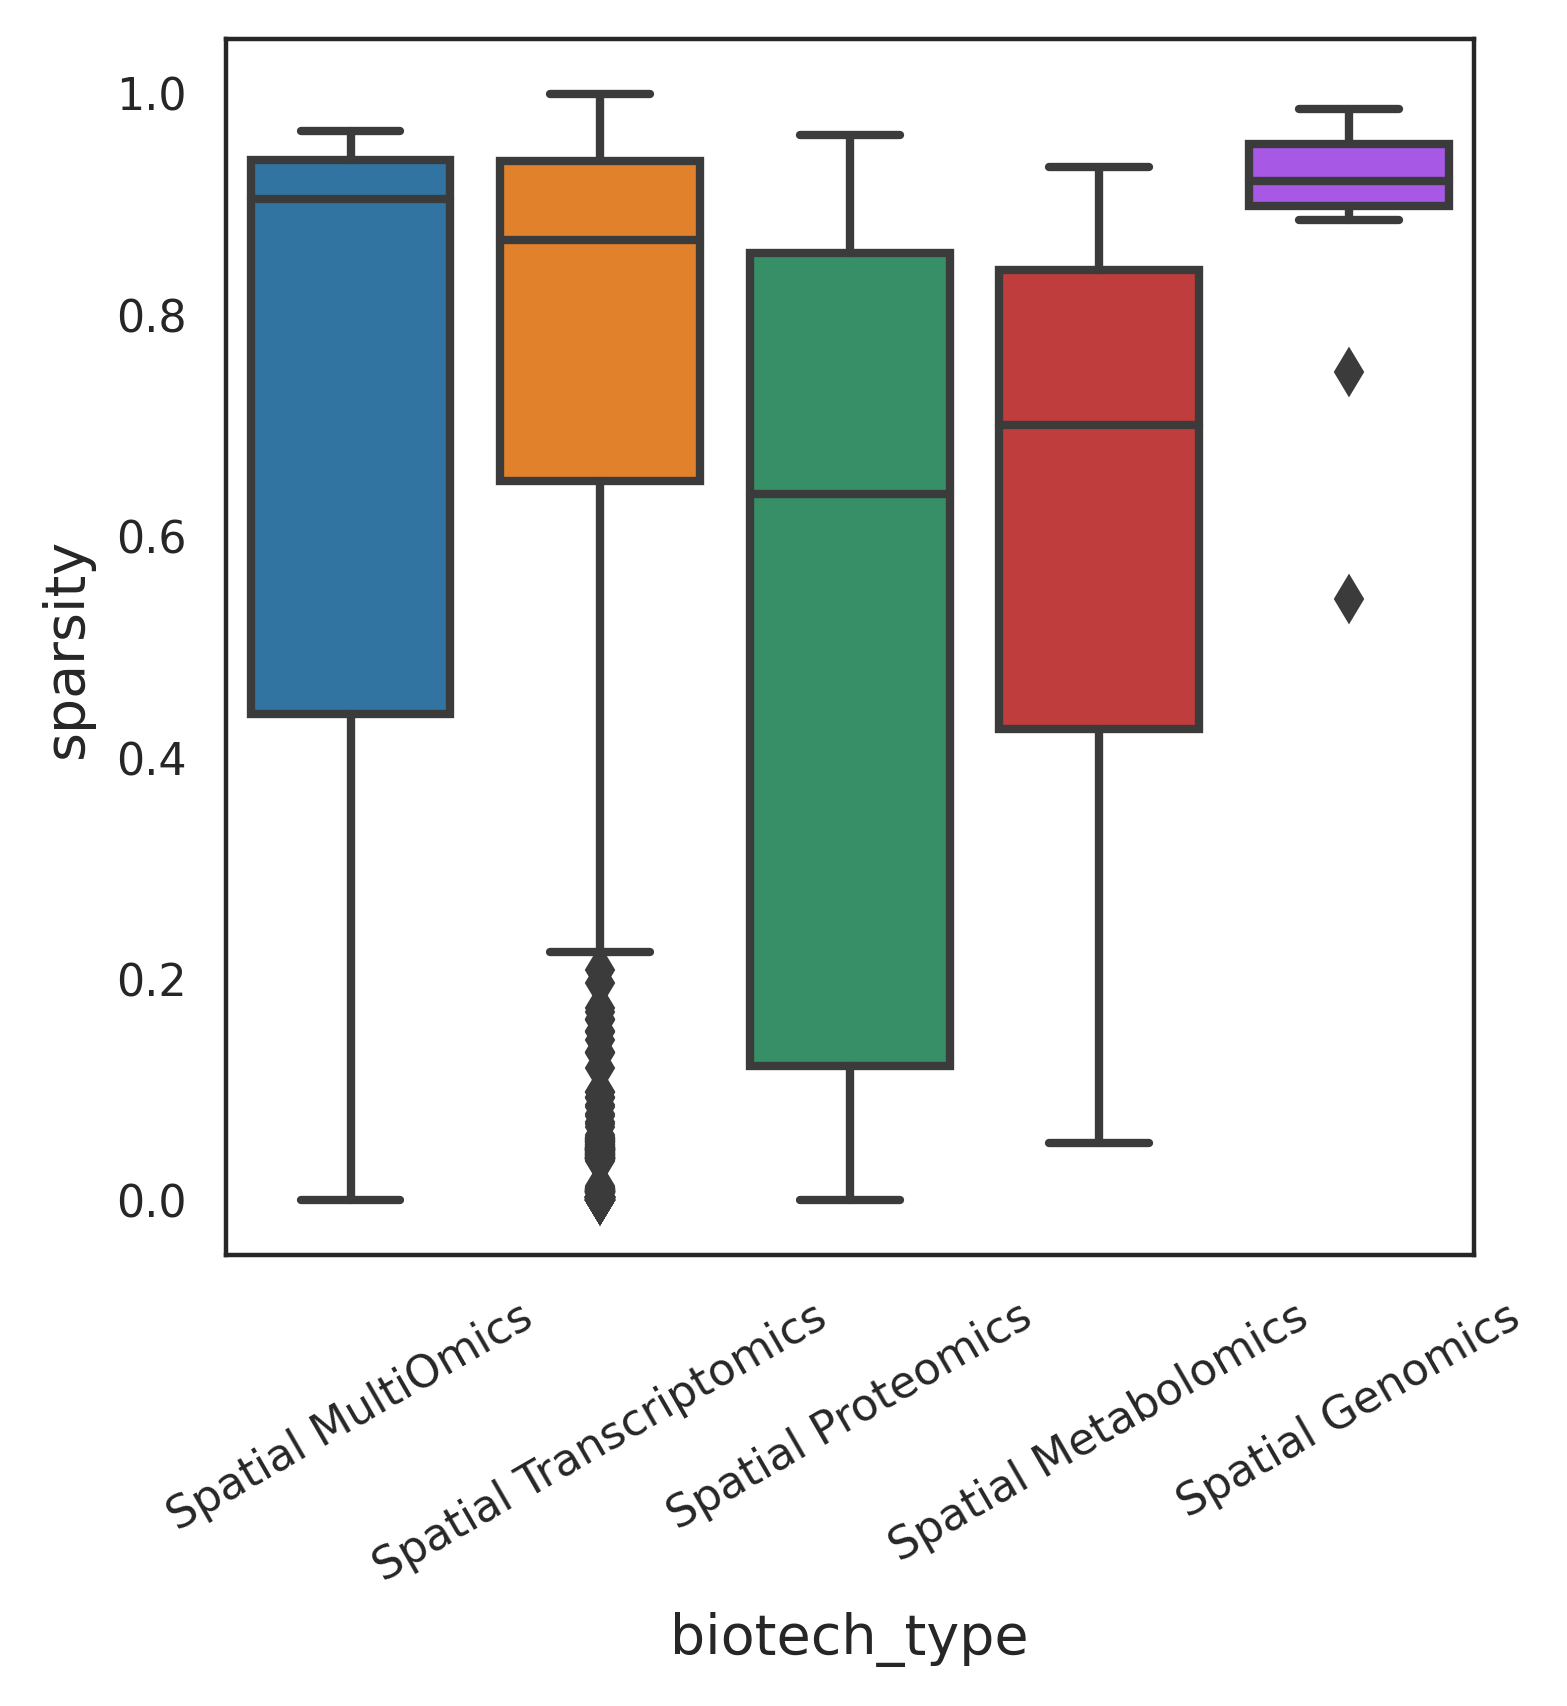

In [3]:
ax = sns.boxplot(x="biotech_type", y="sparsity",
            # hue="smoker", 
            
            data=data)
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)

[Text(0, 0, 'DBiT-seq'),
 Text(1, 0, 'Slide-seqV2'),
 Text(2, 0, 'Slide-seq'),
 Text(3, 0, 'ST'),
 Text(4, 0, '10X Visium'),
 Text(5, 0, 'sciSpace'),
 Text(6, 0, 'Stereo-seq'),
 Text(7, 0, 'MERFISH'),
 Text(8, 0, 'osmFISH'),
 Text(9, 0, 'seqFISH'),
 Text(10, 0, 'seqFISH+'),
 Text(11, 0, 'EASI-FISH'),
 Text(12, 0, '3D IMC'),
 Text(13, 0, 'MIBI'),
 Text(14, 0, 't-CyCIF'),
 Text(15, 0, 'CODEX'),
 Text(16, 0, '4i'),
 Text(17, 0, 'SIMS'),
 Text(18, 0, 'DESI'),
 Text(19, 0, 'MALDI'),
 Text(20, 0, 'HDST'),
 Text(21, 0, 'Slide-DNA-seq'),
 Text(22, 0, 'STARmap')]

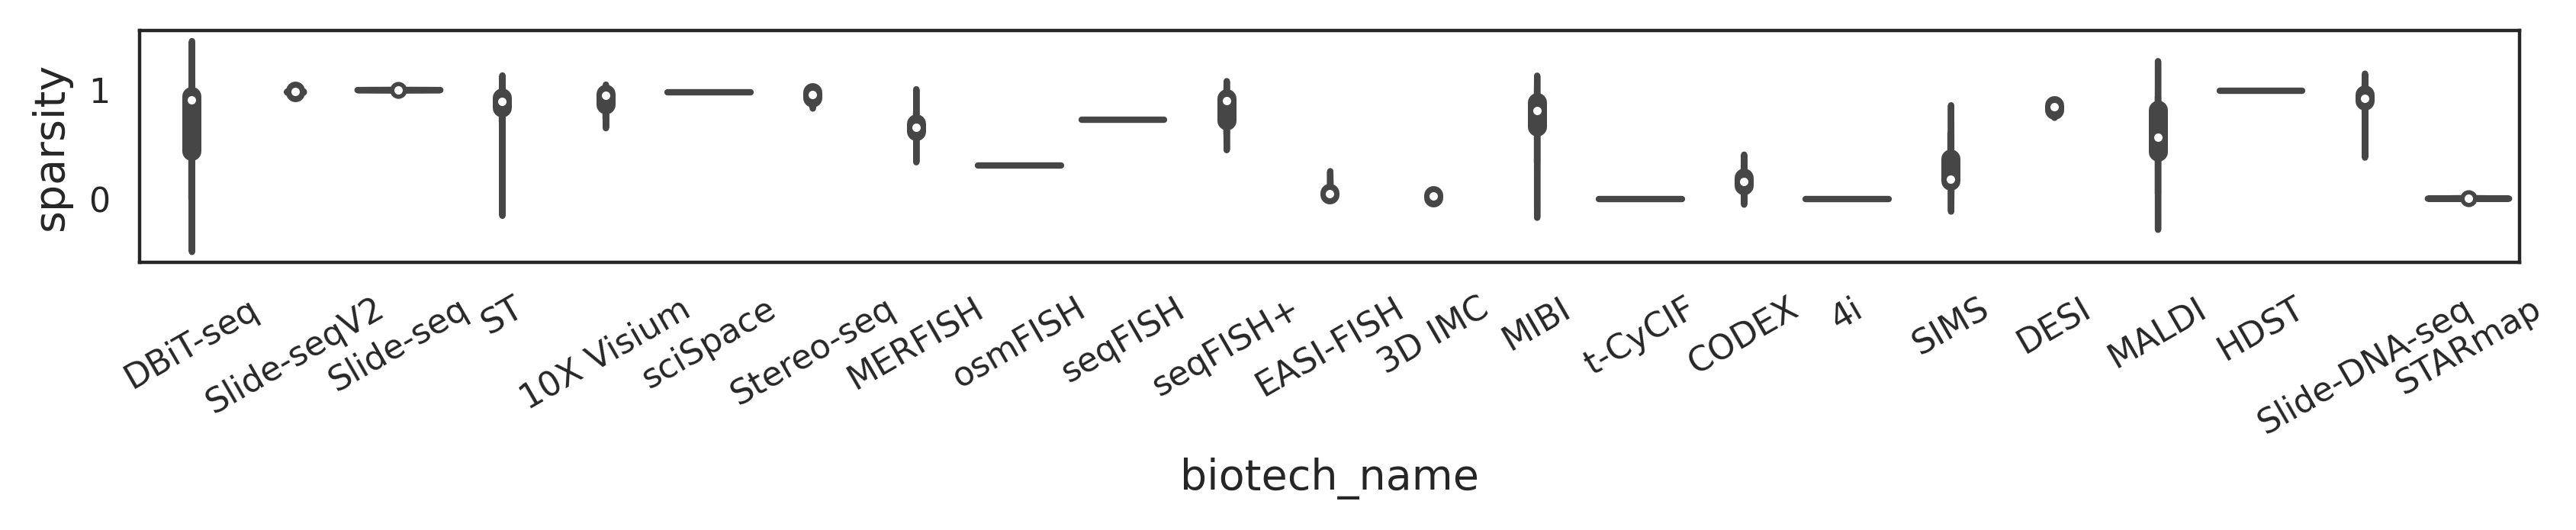

In [6]:
fig,ax = plt.subplots(1,1,figsize=(10,1))
sns.violinplot(x="biotech_name", 
                 y="sparsity",
            # hue="smoker", 
            ax=ax,
            data=data)
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)

[Text(0, 0, 'DBiT-seq'),
 Text(1, 0, 'Slide-seqV2'),
 Text(2, 0, 'Slide-seq'),
 Text(3, 0, 'ST'),
 Text(4, 0, '10X Visium'),
 Text(5, 0, 'sciSpace'),
 Text(6, 0, 'Stereo-seq'),
 Text(7, 0, 'MERFISH'),
 Text(8, 0, 'osmFISH'),
 Text(9, 0, 'seqFISH'),
 Text(10, 0, 'seqFISH+'),
 Text(11, 0, 'EASI-FISH'),
 Text(12, 0, '3D IMC'),
 Text(13, 0, 'MIBI'),
 Text(14, 0, 't-CyCIF'),
 Text(15, 0, 'CODEX'),
 Text(16, 0, '4i'),
 Text(17, 0, 'SIMS'),
 Text(18, 0, 'DESI'),
 Text(19, 0, 'MALDI'),
 Text(20, 0, 'HDST'),
 Text(21, 0, 'Slide-DNA-seq'),
 Text(22, 0, 'STARmap')]

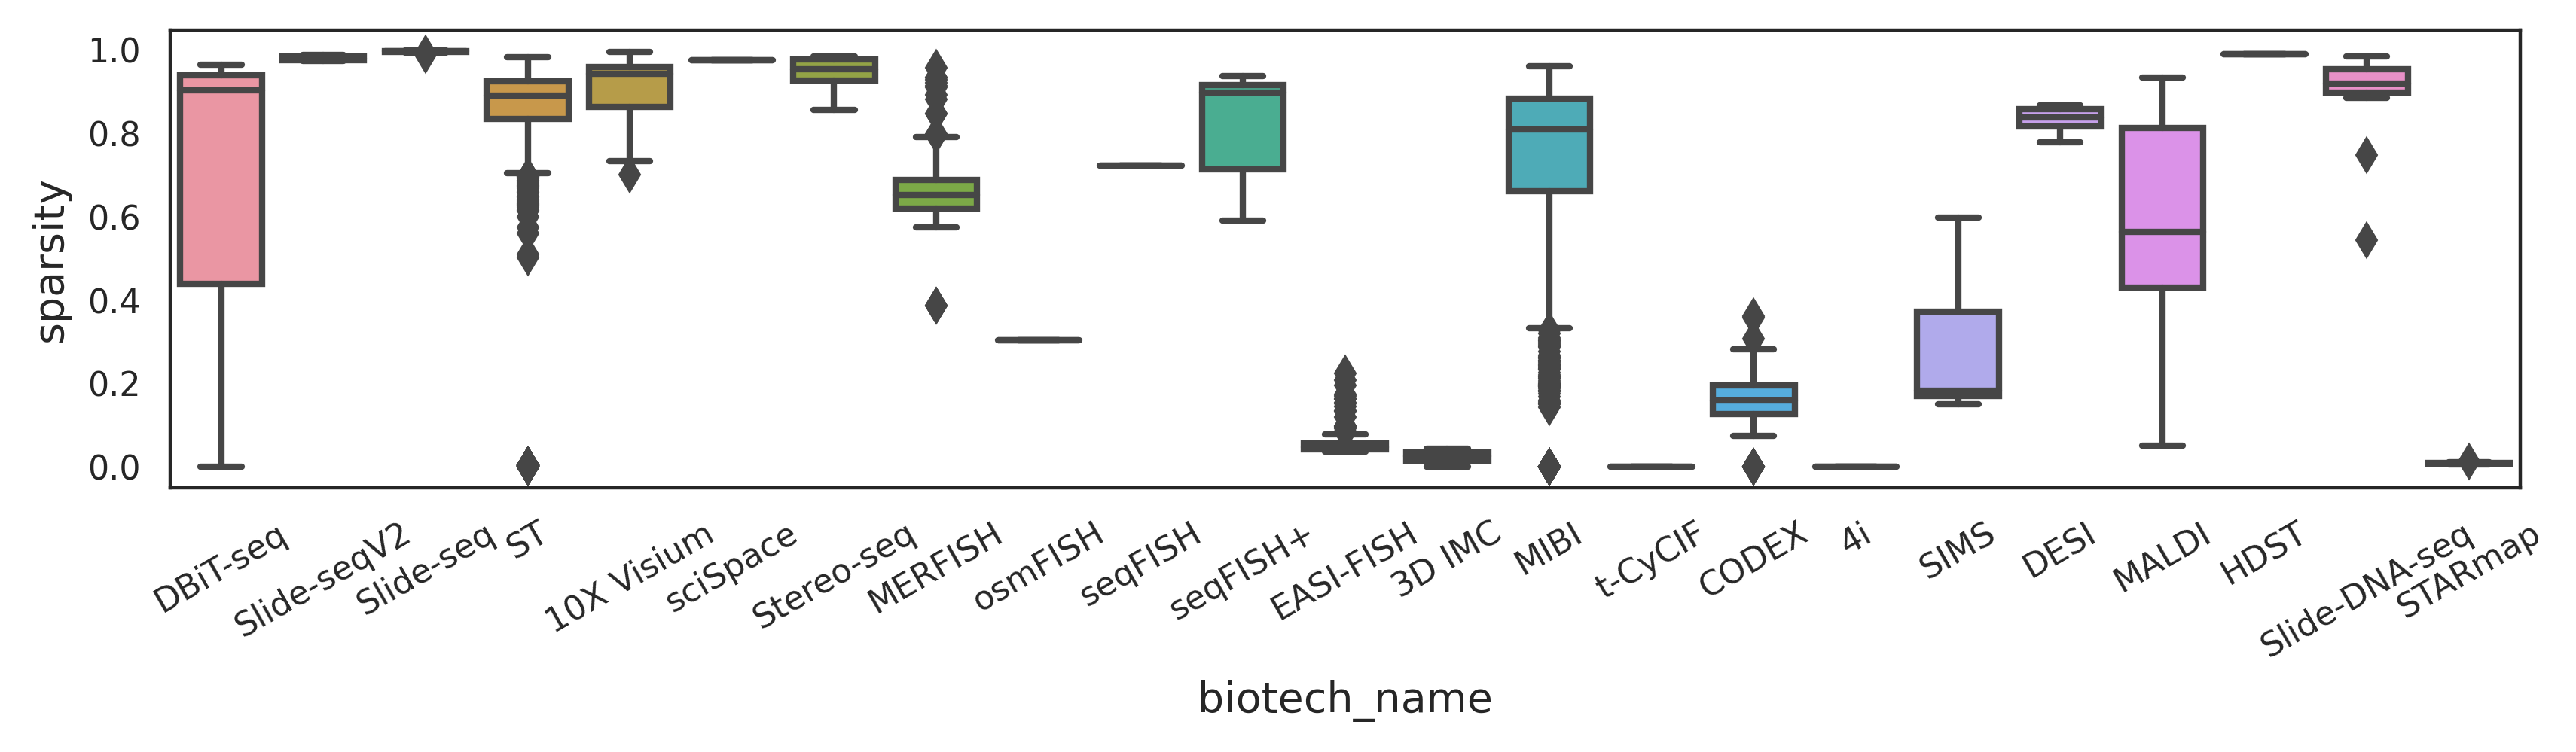

In [53]:
fig,ax = plt.subplots(1,1,figsize=(10,2))
sns.boxplot(x="biotech_name", 
                 y="sparsity",
            # hue="smoker", 
            ax=ax,
            data=data)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)

In [59]:
data.columns

Index(['ID', 'Name', 'Biotech_ID', 'Dataset_ID', 'H5ad_Path', 'GeneList_Path',
       'Histology_Path', 'Species', 'Tissue', 'N_Unit', 'N_Gene', 'Zip_Path',
       'with_control', 'with_replicate', 'with_annotation', 'with_publication',
       'biotech_name', 'biotech_type', 'with_SEgene_annotation', 'sparsity',
       'SE_l0', 'SE_l1', 'SE_l2', 'SE_l3', 'SE_l4'],
      dtype='object')

In [65]:
data['N_Gene'].astype('int')

0          22
1          22
2       21890
3       22802
4       22969
        ...  
2179      250
2180     4000
2181      250
2182      242
2183     4000
Name: N_Gene, Length: 2184, dtype: int64

In [8]:
data['SE_largerthan_0'] = data['N_Gene'].astype('int') - data['SE_l4']

In [9]:
data['SE_largerthan_0_perc'] = data['SE_largerthan_0']/data['N_Gene'].astype('int')

[Text(0, 0, 'DBiT-seq'),
 Text(1, 0, 'Slide-seqV2'),
 Text(2, 0, 'Slide-seq'),
 Text(3, 0, 'ST'),
 Text(4, 0, '10X Visium'),
 Text(5, 0, 'sciSpace'),
 Text(6, 0, 'Stereo-seq'),
 Text(7, 0, 'MERFISH'),
 Text(8, 0, 'osmFISH'),
 Text(9, 0, 'seqFISH'),
 Text(10, 0, 'seqFISH+'),
 Text(11, 0, 'EASI-FISH'),
 Text(12, 0, '3D IMC'),
 Text(13, 0, 'MIBI'),
 Text(14, 0, 't-CyCIF'),
 Text(15, 0, 'CODEX'),
 Text(16, 0, '4i'),
 Text(17, 0, 'SIMS'),
 Text(18, 0, 'DESI'),
 Text(19, 0, 'MALDI'),
 Text(20, 0, 'HDST'),
 Text(21, 0, 'Slide-DNA-seq'),
 Text(22, 0, 'STARmap')]

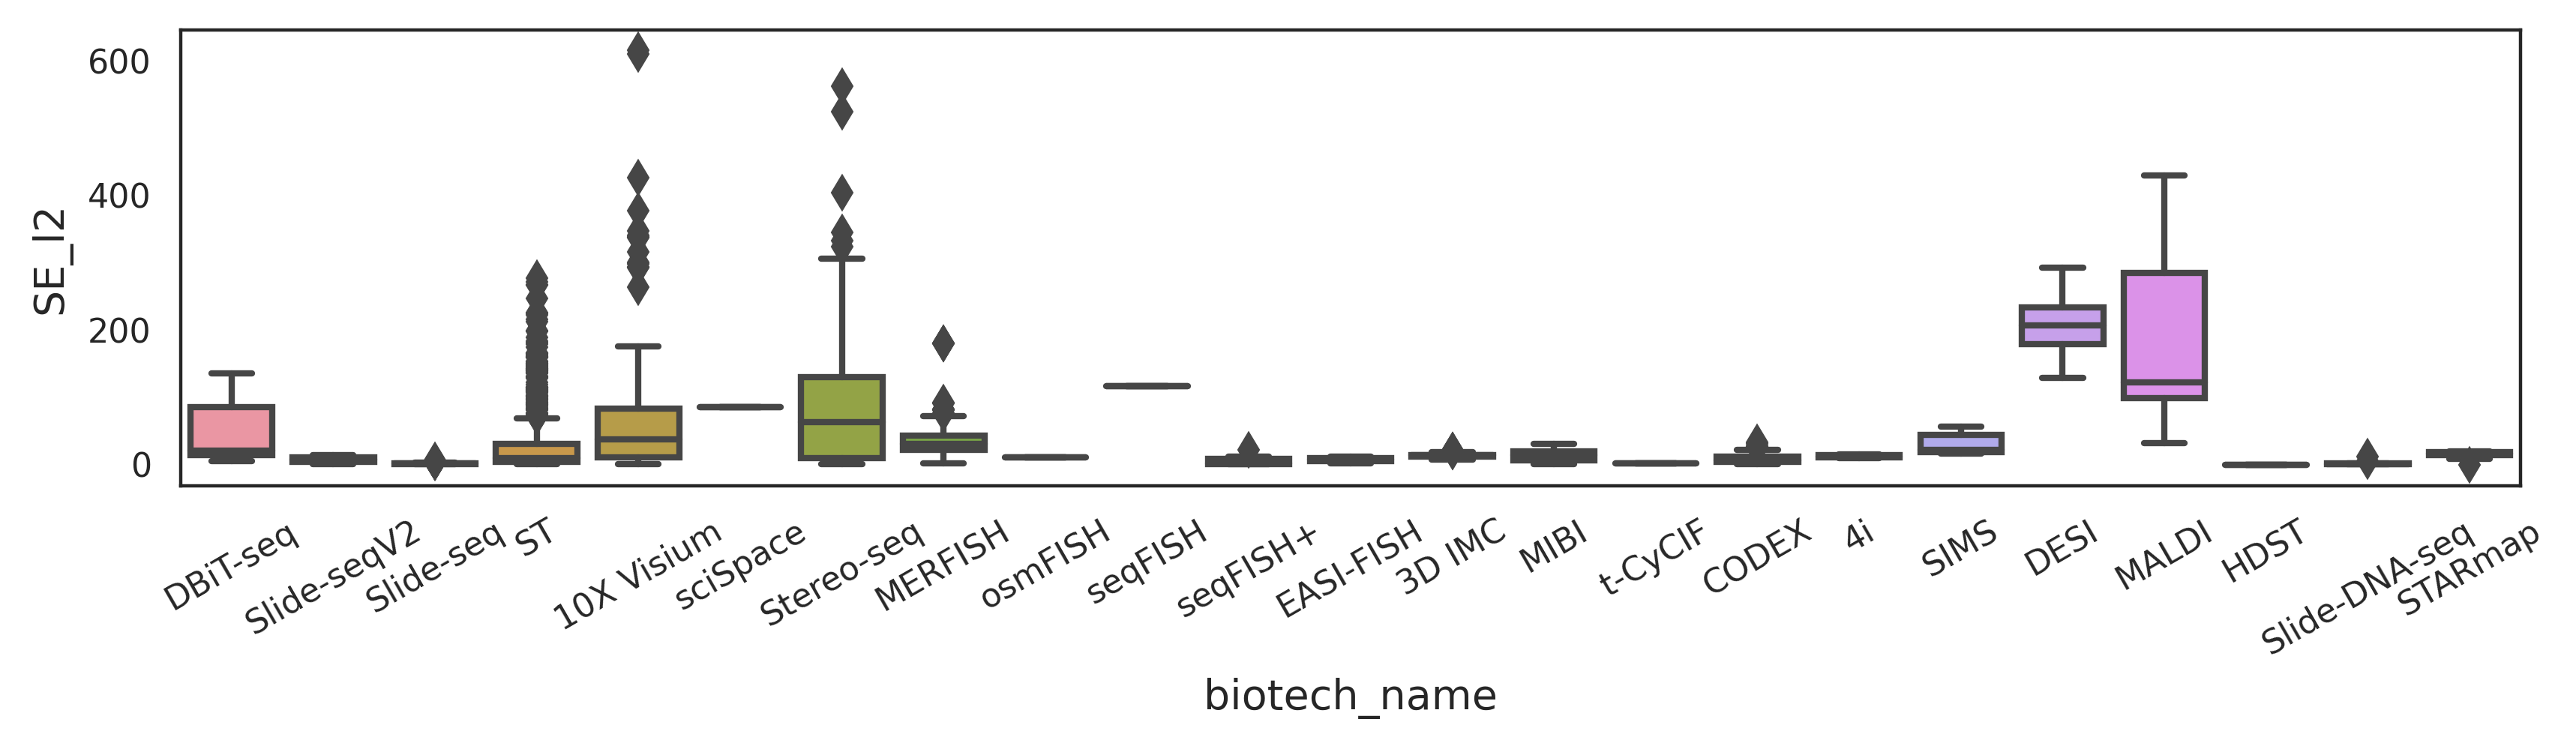

In [56]:
fig,ax = plt.subplots(1,1,figsize=(10,2))
sns.boxplot(x="biotech_name", 
                 y="SE_l2",
            # hue="smoker", 
            ax=ax,
            data=data)
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)

[Text(0, 0, 'DBiT-seq'),
 Text(1, 0, 'Slide-seqV2'),
 Text(2, 0, 'Slide-seq'),
 Text(3, 0, 'ST'),
 Text(4, 0, '10X Visium'),
 Text(5, 0, 'sciSpace'),
 Text(6, 0, 'Stereo-seq'),
 Text(7, 0, 'MERFISH'),
 Text(8, 0, 'osmFISH'),
 Text(9, 0, 'seqFISH'),
 Text(10, 0, 'seqFISH+'),
 Text(11, 0, 'EASI-FISH'),
 Text(12, 0, '3D IMC'),
 Text(13, 0, 'MIBI'),
 Text(14, 0, 't-CyCIF'),
 Text(15, 0, 'CODEX'),
 Text(16, 0, '4i'),
 Text(17, 0, 'SIMS'),
 Text(18, 0, 'DESI'),
 Text(19, 0, 'MALDI'),
 Text(20, 0, 'HDST'),
 Text(21, 0, 'Slide-DNA-seq'),
 Text(22, 0, 'STARmap')]

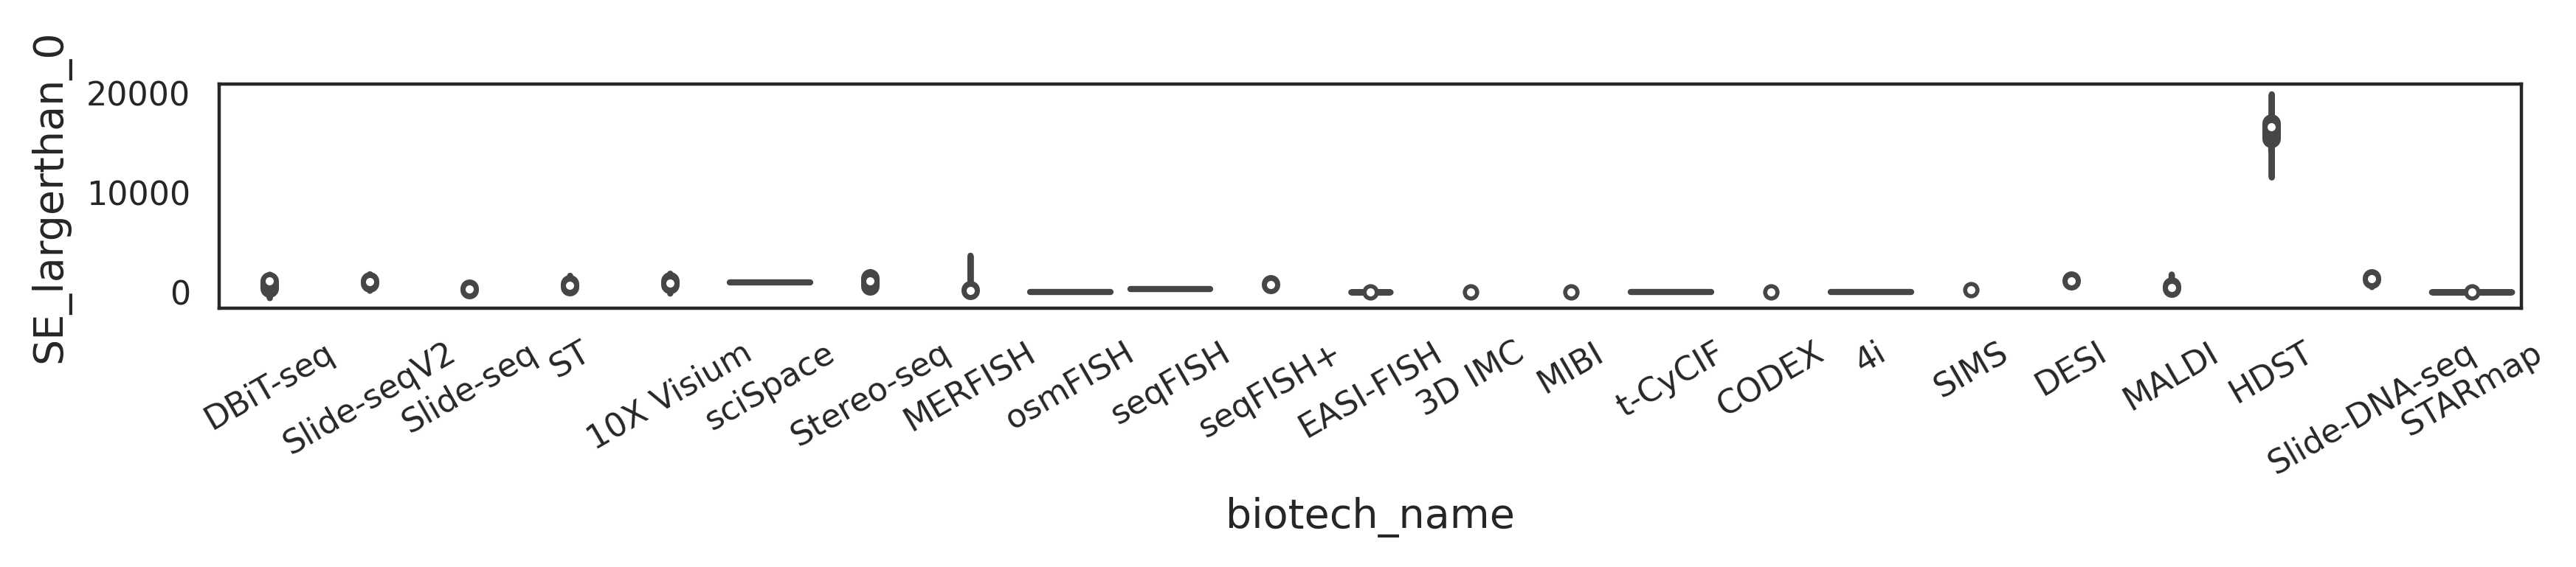

In [81]:
fig,ax = plt.subplots(1,1,figsize=(10,1))
sns.violinplot(x="biotech_name", 
                 y="SE_largerthan_0",
            # hue="smoker", 
            ax=ax,
            data=data)
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)

[Text(0, 0, 'DBiT-seq'),
 Text(1, 0, 'Slide-seqV2'),
 Text(2, 0, 'Slide-seq'),
 Text(3, 0, 'ST'),
 Text(4, 0, '10X Visium'),
 Text(5, 0, 'sciSpace'),
 Text(6, 0, 'Stereo-seq'),
 Text(7, 0, 'MERFISH'),
 Text(8, 0, 'osmFISH'),
 Text(9, 0, 'seqFISH'),
 Text(10, 0, 'seqFISH+'),
 Text(11, 0, 'EASI-FISH'),
 Text(12, 0, '3D IMC'),
 Text(13, 0, 'MIBI'),
 Text(14, 0, 't-CyCIF'),
 Text(15, 0, 'CODEX'),
 Text(16, 0, '4i'),
 Text(17, 0, 'SIMS'),
 Text(18, 0, 'DESI'),
 Text(19, 0, 'MALDI'),
 Text(20, 0, 'HDST'),
 Text(21, 0, 'Slide-DNA-seq'),
 Text(22, 0, 'STARmap')]

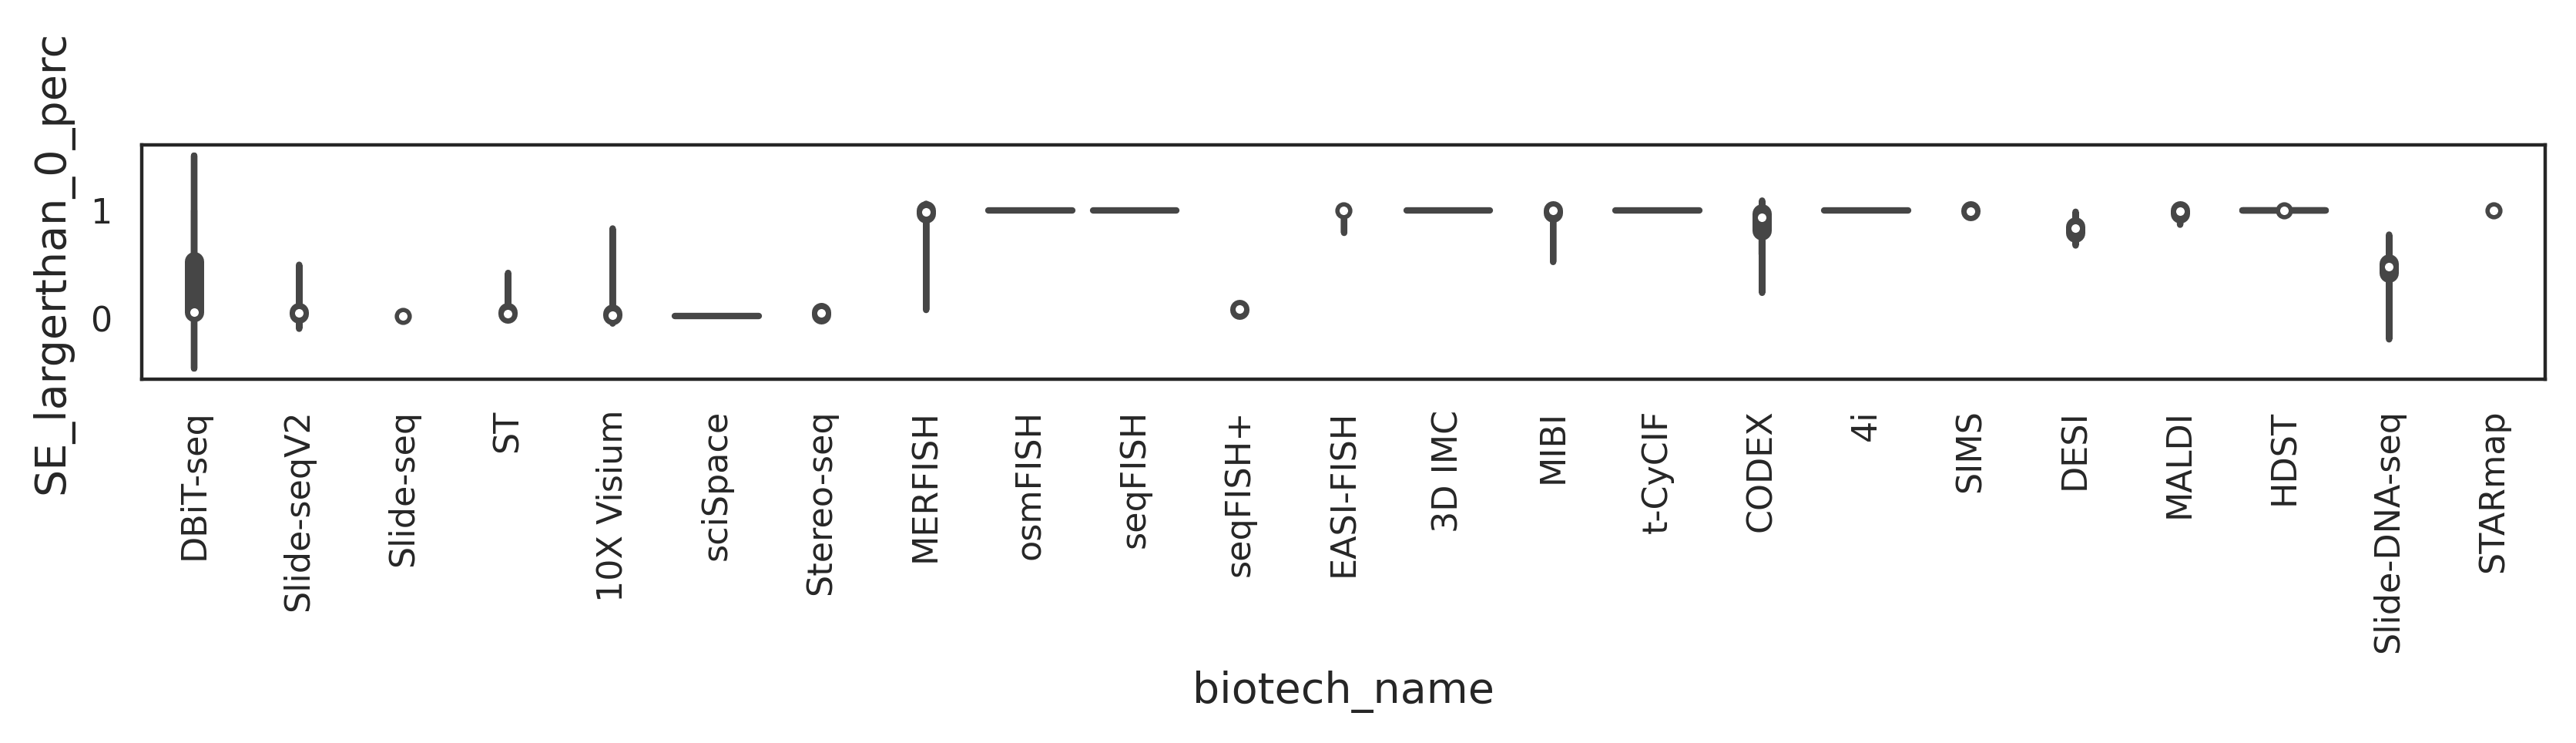

In [17]:
fig,ax = plt.subplots(1,1,figsize=(10,1))
sns.violinplot(x="biotech_name", 
                 y="SE_largerthan_0_perc",
            # hue="smoker", 
            ax=ax,
            data=data)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)

[Text(0, 0, 'DBiT-seq'),
 Text(1, 0, 'Slide-seqV2'),
 Text(2, 0, 'Slide-seq'),
 Text(3, 0, 'ST'),
 Text(4, 0, '10X Visium'),
 Text(5, 0, 'sciSpace'),
 Text(6, 0, 'Stereo-seq'),
 Text(7, 0, 'MERFISH'),
 Text(8, 0, 'osmFISH'),
 Text(9, 0, 'seqFISH'),
 Text(10, 0, 'seqFISH+'),
 Text(11, 0, 'EASI-FISH'),
 Text(12, 0, '3D IMC'),
 Text(13, 0, 'MIBI'),
 Text(14, 0, 't-CyCIF'),
 Text(15, 0, 'CODEX'),
 Text(16, 0, '4i'),
 Text(17, 0, 'SIMS'),
 Text(18, 0, 'DESI'),
 Text(19, 0, 'MALDI'),
 Text(20, 0, 'HDST'),
 Text(21, 0, 'Slide-DNA-seq'),
 Text(22, 0, 'STARmap')]

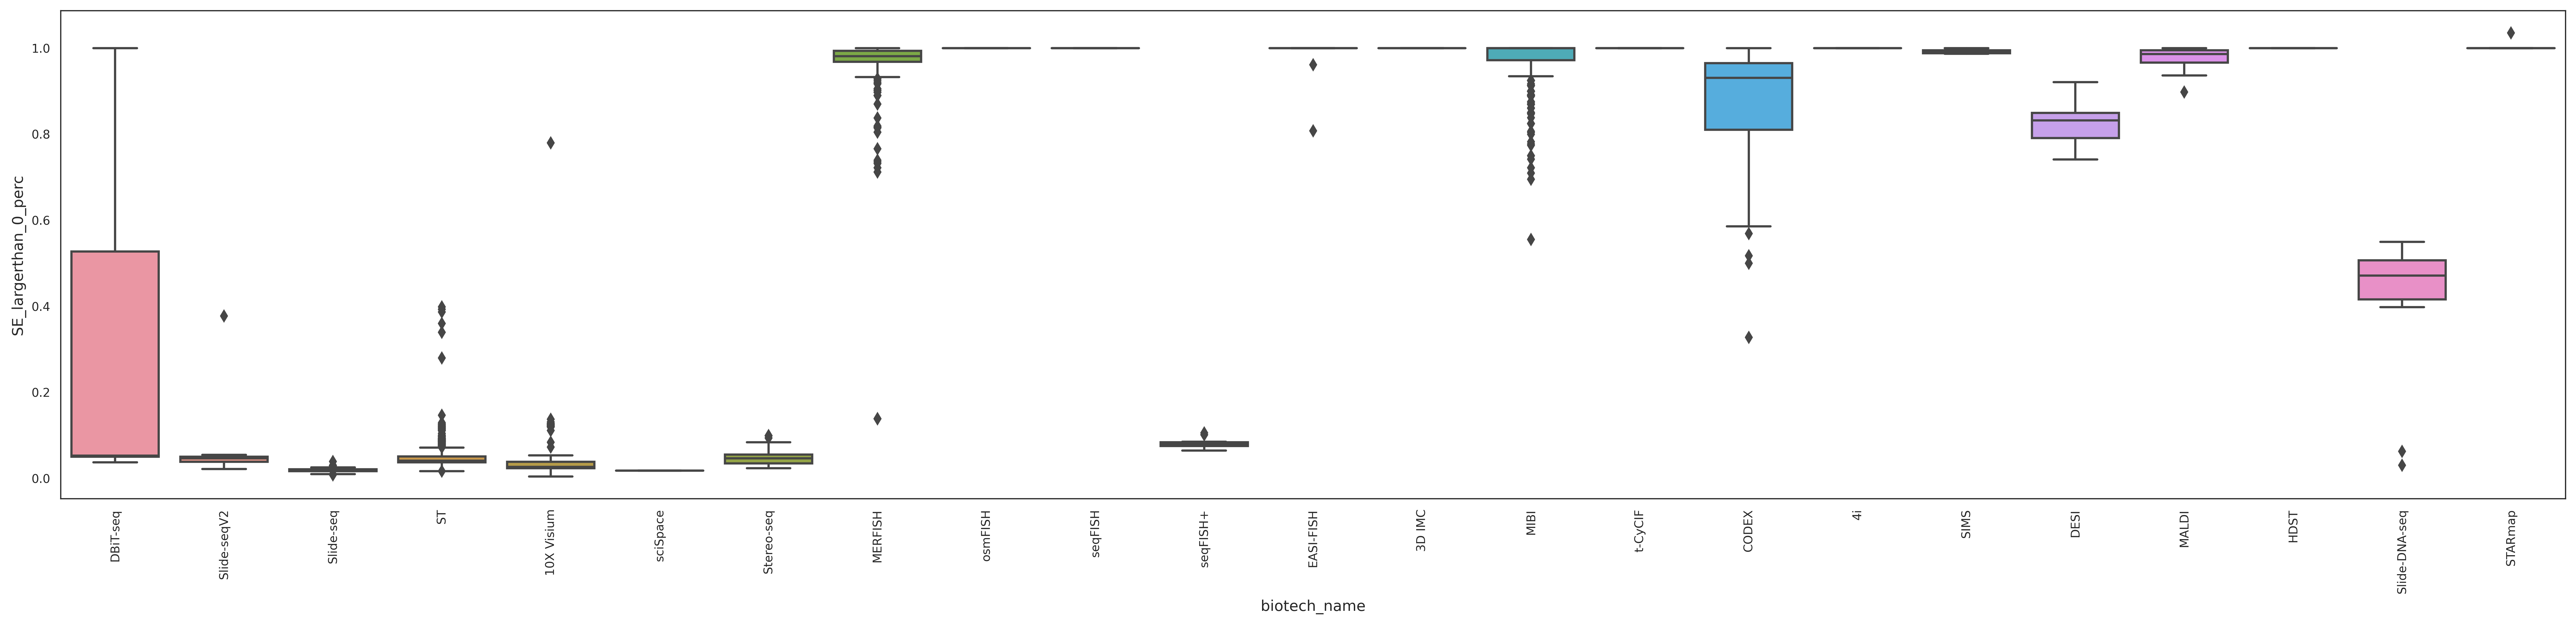

In [19]:
fig,ax = plt.subplots(1,1,figsize=(30,6))
sns.boxplot(x="biotech_name", 
                 y="SE_largerthan_0_perc",
            # hue="smoker", 
            ax=ax,
            data=data)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)

[Text(0, 0, 'DBiT-seq'),
 Text(1, 0, 'Slide-seqV2'),
 Text(2, 0, 'Slide-seq'),
 Text(3, 0, 'ST'),
 Text(4, 0, '10X Visium'),
 Text(5, 0, 'sciSpace'),
 Text(6, 0, 'Stereo-seq'),
 Text(7, 0, 'MERFISH'),
 Text(8, 0, 'osmFISH'),
 Text(9, 0, 'seqFISH'),
 Text(10, 0, 'seqFISH+'),
 Text(11, 0, 'EASI-FISH'),
 Text(12, 0, '3D IMC'),
 Text(13, 0, 'MIBI'),
 Text(14, 0, 't-CyCIF'),
 Text(15, 0, 'CODEX'),
 Text(16, 0, '4i'),
 Text(17, 0, 'SIMS'),
 Text(18, 0, 'DESI'),
 Text(19, 0, 'MALDI'),
 Text(20, 0, 'HDST'),
 Text(21, 0, 'Slide-DNA-seq'),
 Text(22, 0, 'STARmap')]

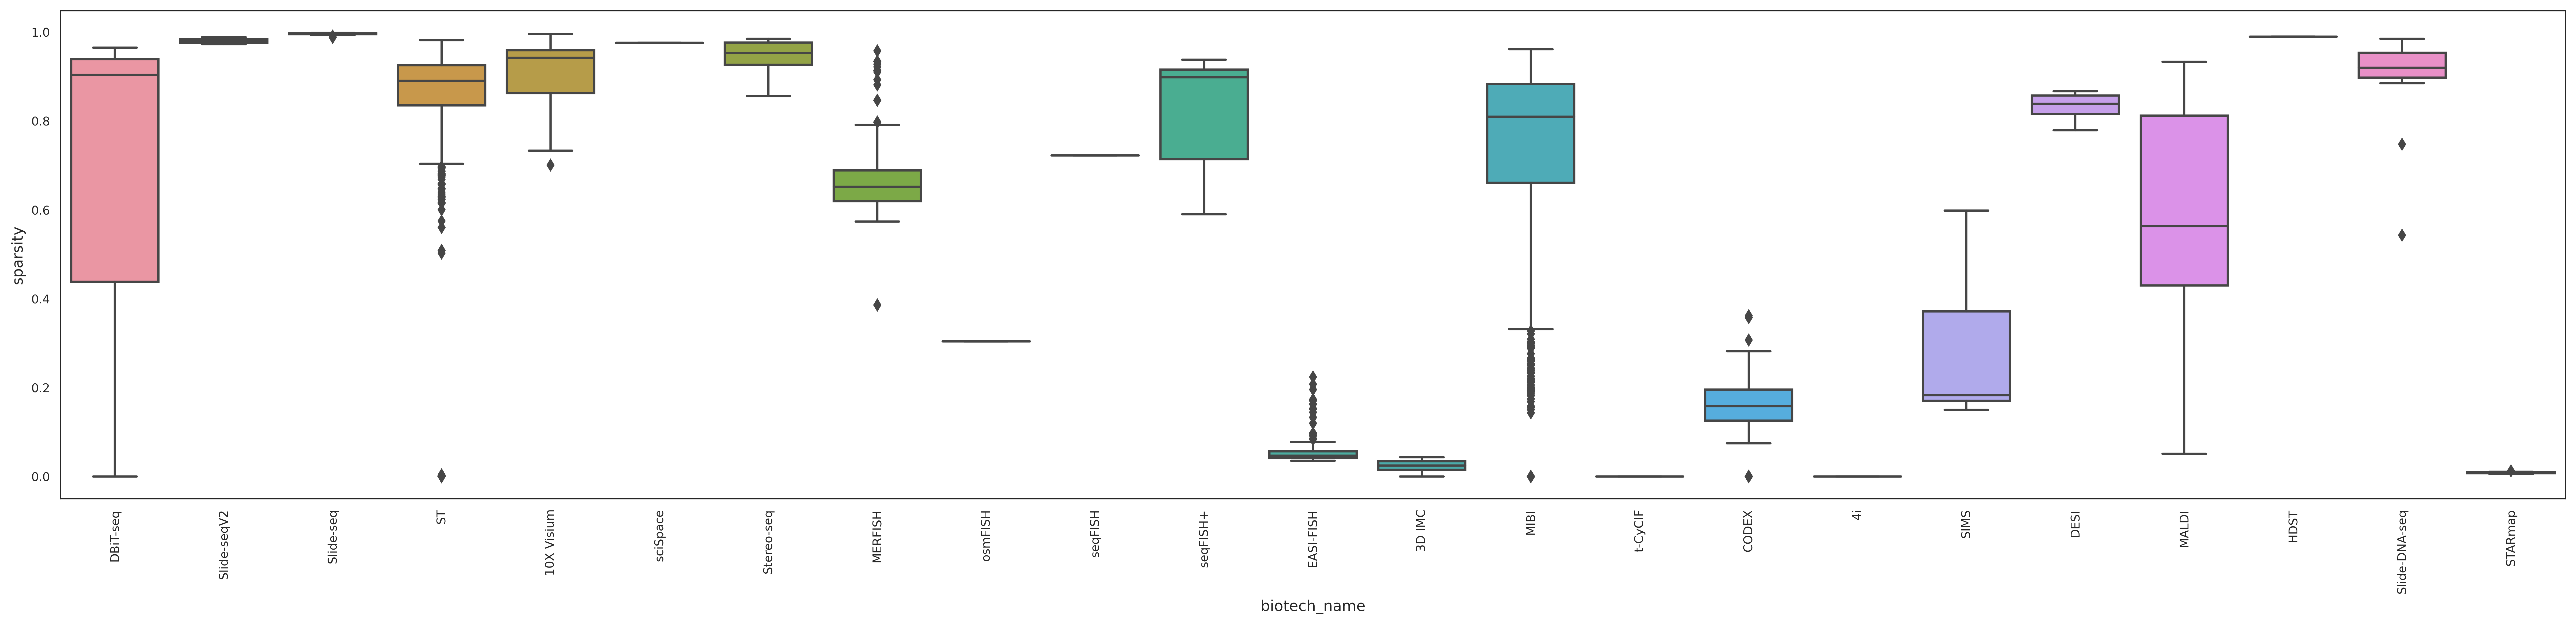

In [20]:
fig,ax = plt.subplots(1,1,figsize=(30,6))
sns.boxplot(x="biotech_name", 
                 y="sparsity",
            # hue="smoker", 
            ax=ax,
            data=data)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)